In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Matmul FLOP
#df = pd.read_csv('data/sac_find_best_matmul.csv')
#flop = df['size'] * df['size'] * (2 * df['size'] - 1)
# N-body FLOP
#df = pd.read_csv('data/sac_find_best_nbody.csv')
#flop = 20 * df['size'] * df['size'] + 12 * df['size']
# Relax FLOP
df = pd.read_csv('data/sac_find_best_relax.csv')
flop = 17 * df['size'] * df['size']

df['GFLOP/J'] = (flop / 1e9) / df['energy']
df['GFLOP/s'] = (flop / 1e9) / df['runtime']
df['GFLOP/J SD'] = 0 * df['energysd'] # How to compute this?

#df['energy'] -= df['runtime'] * 3.85

df

,pin,size,threads,runtime,runtimesd,energy,energysd,GFLOP/J,GFLOP/s,GFLOP/J SD
0,True,1000,1,0.015179,0.000251,0.238348,0.006634,0.071324,1.119935,0.0
1,True,1000,2,0.015457,0.000143,0.245145,0.008552,0.069347,1.099831,0.0
2,True,1000,3,0.010325,0.000095,0.201304,0.009263,0.084449,1.646483,0.0
3,True,1000,4,0.007733,0.000077,0.154683,0.009357,0.109902,2.198314,0.0
4,True,1000,5,0.006184,0.000060,0.144394,0.008922,0.117733,2.748914,0.0
...,...,...,...,...,...,...,...,...,...,...
91,False,25000,12,1.657856,0.016615,63.405602,0.728583,0.167572,6.408881,0.0
92,False,25000,13,1.530043,0.015516,64.396835,0.844431,0.164993,6.944250,0.0
93,False,25000,14,1.426715,0.028033,61.350620,1.137472,0.173185,7.447177,0.0
94,False,25000,15,1.328353,0.014546,62.269283,0.767205,0.170630,7.998625,0.0


In [25]:
def twin_plot(df, ax, bar_y, line_y, sd, bar_label=None, line_label=None, bar_min=True):
    if bar_label == None: bar_label = bar_y
    if line_label == None: line_label = line_y
    
    x = list(range(0, len(df)))
    
    sns.barplot(x=[x+1 for x in x], y=df[bar_y], label=bar_label, legend=False, ax=ax)
    axt = ax.twinx()
    sns.lineplot(x=x, y=df[line_y], label=line_label, legend=False, color='r', ax=axt)

    ax.set_ylim((0,None))
    axt.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=df[bar_y], yerr=df[sd], fmt='none', c='black')

    for bar in ax.patches:
        if ((bar_min and bar.get_height() == df[bar_y].min()) or
            (not bar_min and bar.get_height() == df[bar_y].max())):
            bar.set_color('g')
            break

    ax.set_ylabel(bar_label)
    axt.set_ylabel(line_label)

    return axt

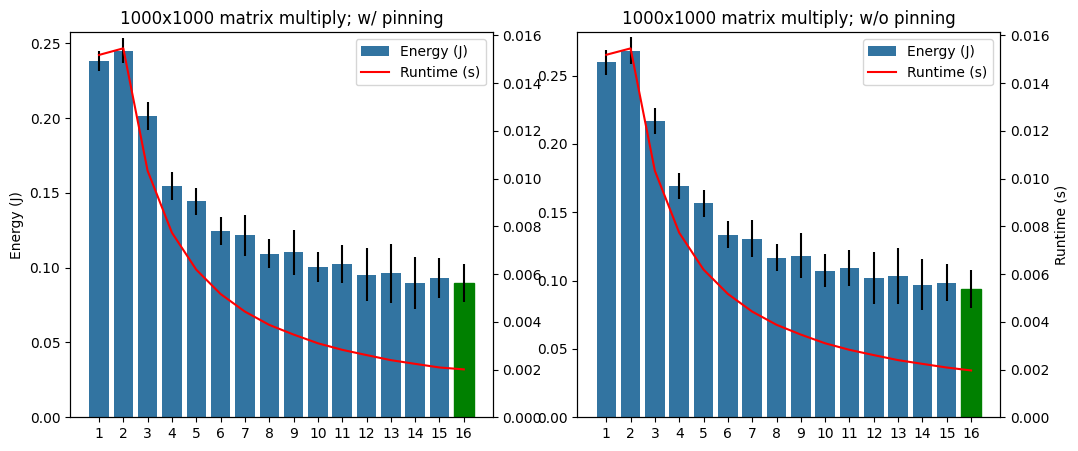

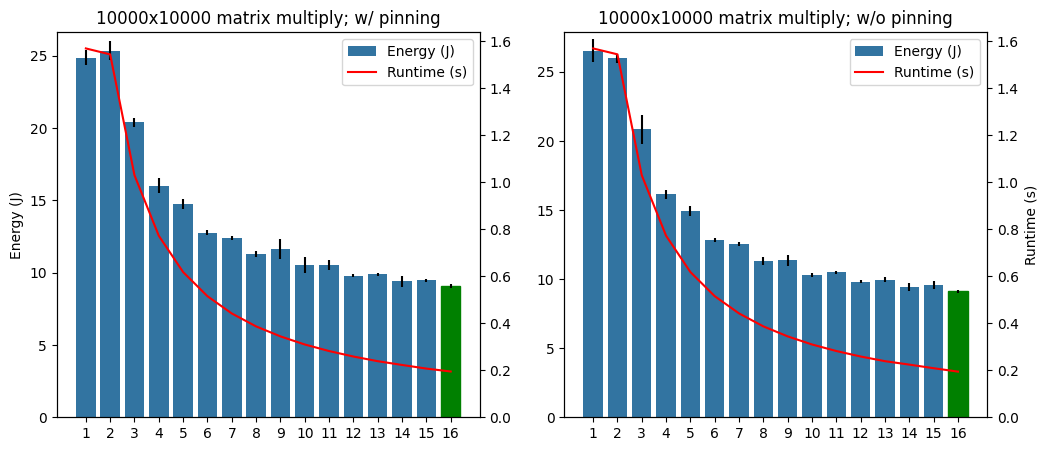

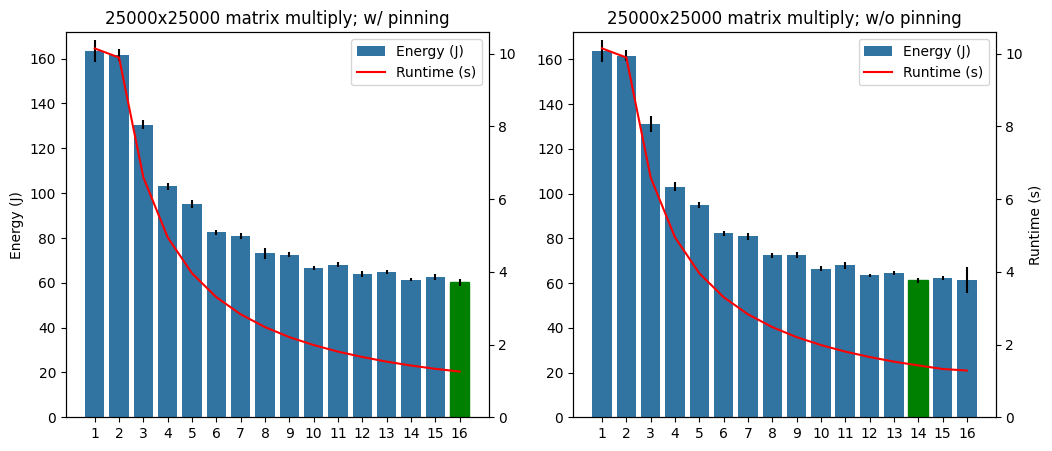

In [26]:
for size, dfx in df.groupby('size'):
    w_pin = dfx[dfx['pin'] == True]
    wo_pin = dfx[dfx['pin'] == False]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    axt = twin_plot(w_pin, ax1, 'energy', 'runtime', 'energysd', 'Energy (J)', 'Runtime (s)')
    twin_plot(wo_pin, ax2, 'energy', 'runtime', 'energysd', 'Energy (J)', 'Runtime (s)')
    axt.set_ylabel('')
    ax2.set_ylabel('')

    ax1.set_title(f'{size}x{size} matrix multiply; w/ pinning')
    ax2.set_title(f'{size}x{size} matrix multiply; w/o pinning')

plt.show()

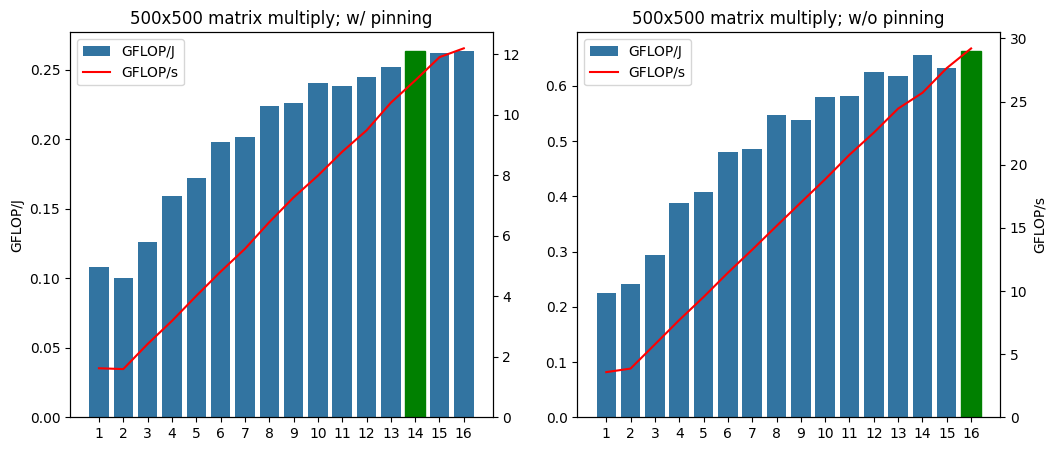

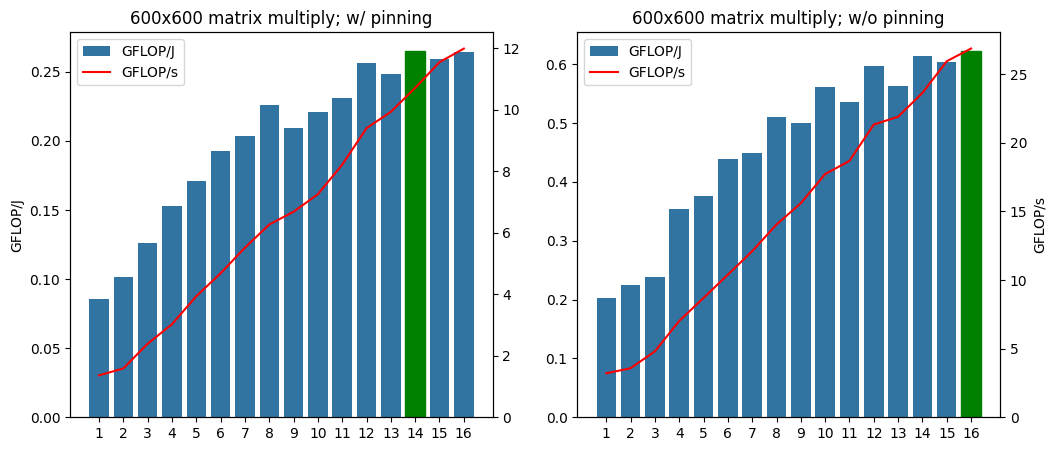

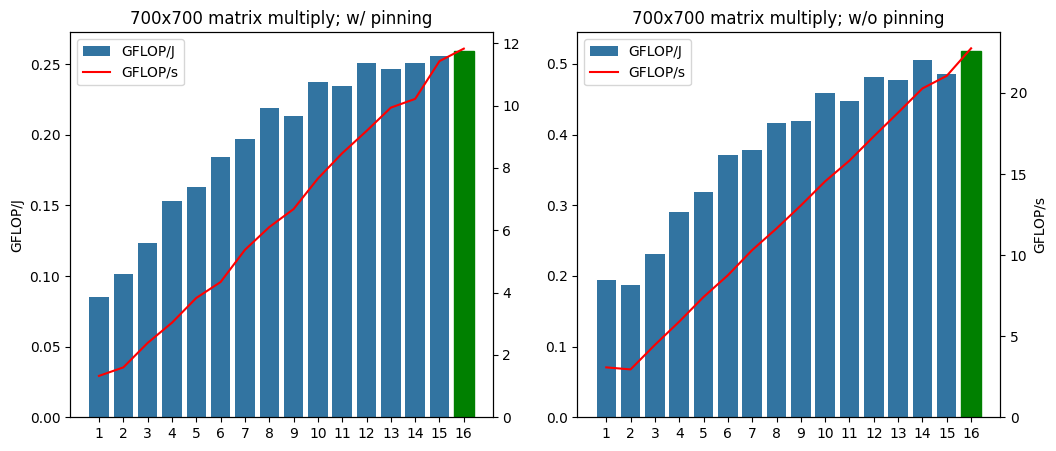

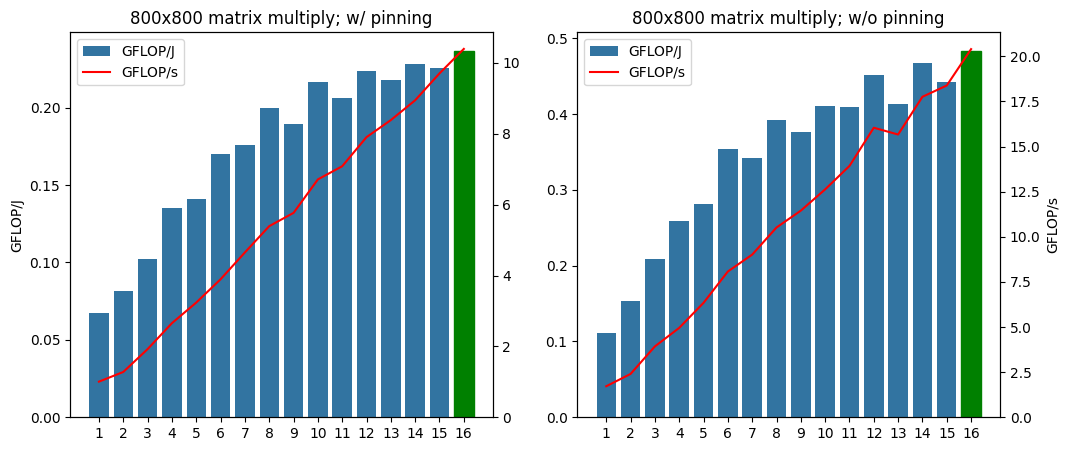

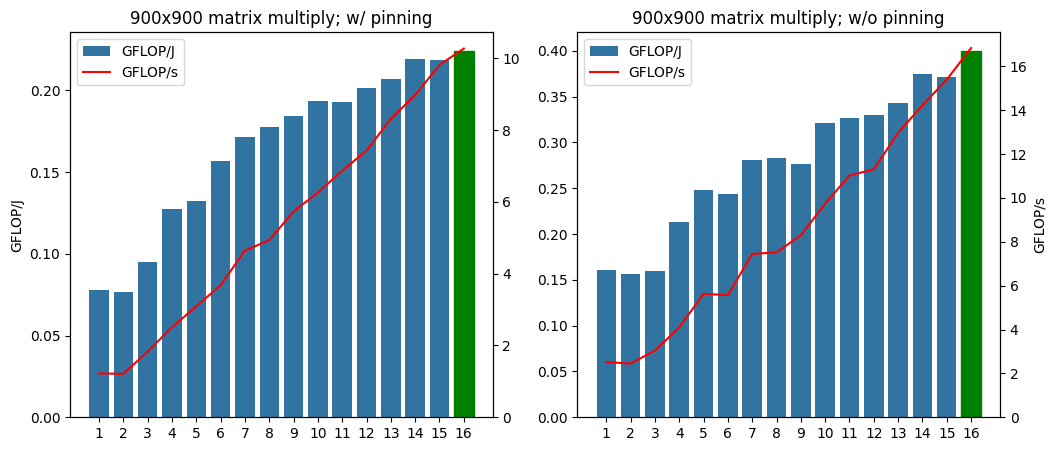

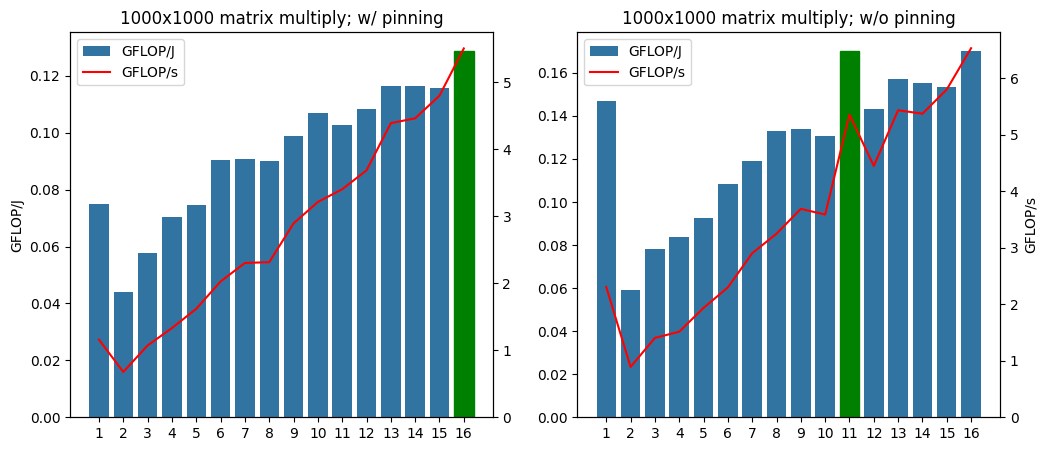

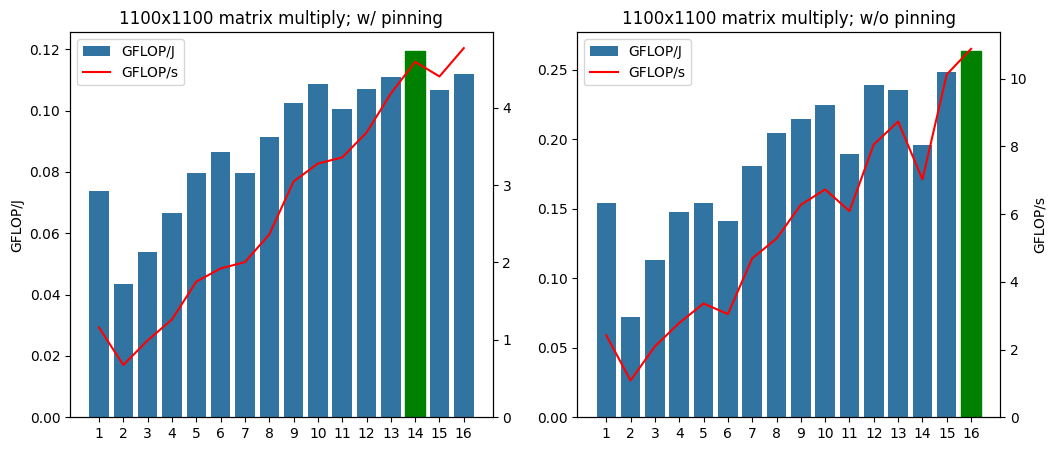

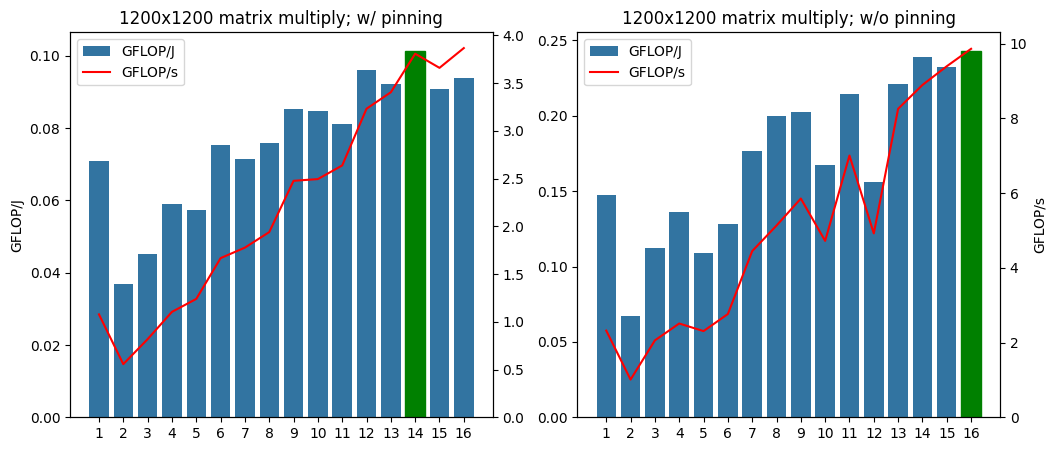

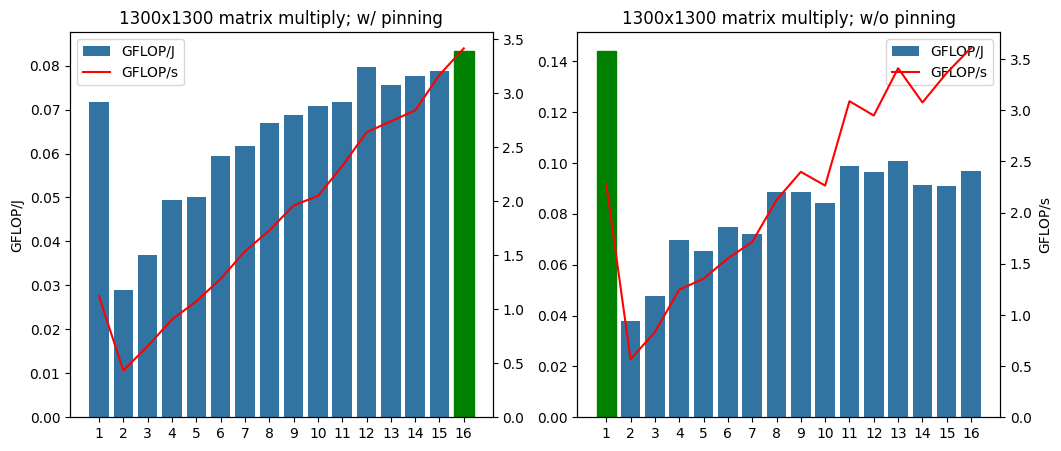

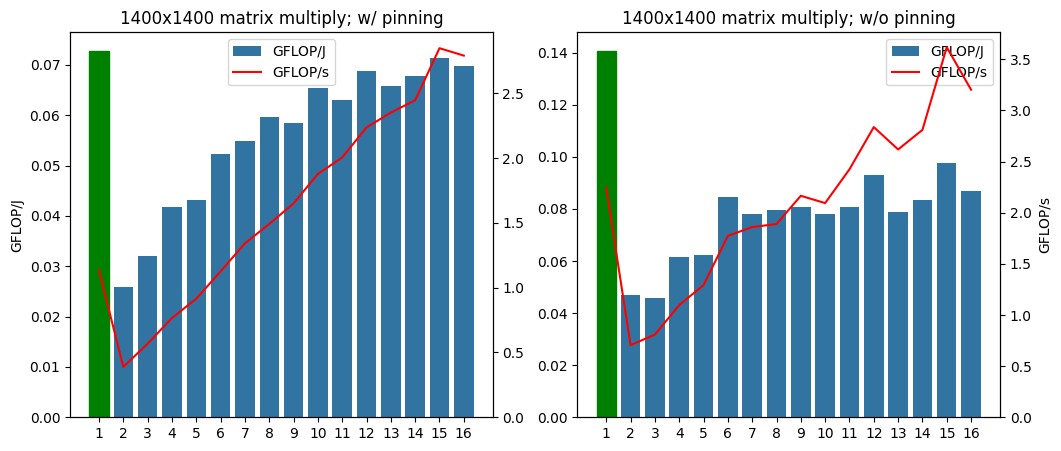

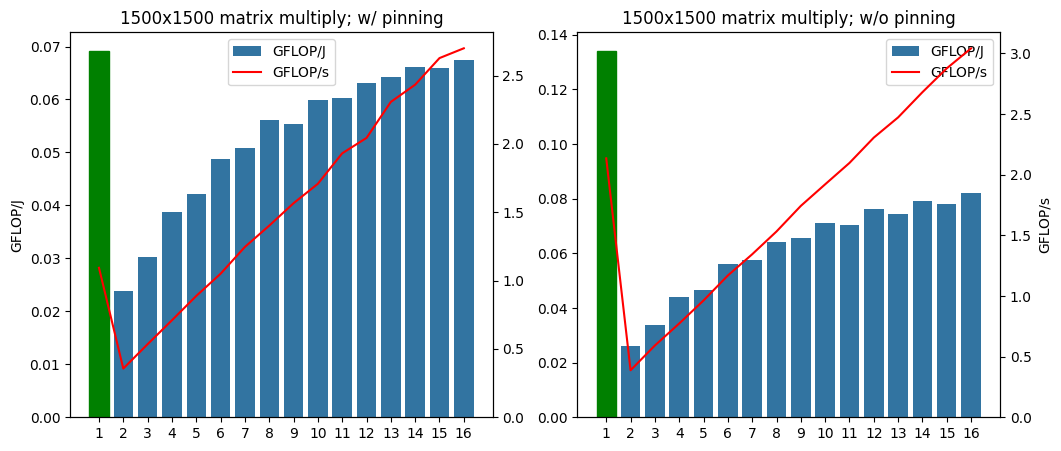

In [14]:
for size, dfx in df.groupby('size'):
    w_pin = dfx[dfx['pin'] == True]
    wo_pin = dfx[dfx['pin'] == False]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    axt = twin_plot(w_pin, ax1, 'GFLOP/J', 'GFLOP/s', 'GFLOP/J SD', bar_min=False)
    twin_plot(wo_pin, ax2, 'GFLOP/J', 'GFLOP/s', 'GFLOP/J SD', bar_min=False)
    axt.set_ylabel('')
    ax2.set_ylabel('')

    ax1.set_title(f'{size}x{size} matrix multiply; w/ pinning')
    ax2.set_title(f'{size}x{size} matrix multiply; w/o pinning')

plt.show()